Plotando os espectrogramas de cada canal

In [5]:
import wave
import numpy as np
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [8]:
file_raw ='C:/Users/flora/OneDrive/Documentos/MESTRADO_UFSC/rotinas/python/Flora/espectrogramas/five_second_call.wav'
file_den ='C:/Users/flora/OneDrive/Documentos/MESTRADO_UFSC/rotinas/python/Flora/espectrogramas/denoised_five_second_call.wav'

In [9]:
audio_data, sample_rate = librosa.load(file_raw, sr=None, mono=False)


In [4]:
#notamos os quatro canais
audio_data.shape

(4, 480000)

In [10]:
#função do espectrograma 

def plot_spectrogram(Y, sr, hop_length, y_axis="linear", title="Spectrogram"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y,
                             sr=sr,
                             hop_length=hop_length,
                             x_axis="time",
                             y_axis=y_axis,
                             cmap='gray')
    cbar = plt.colorbar(format="%+2.f")
    cbar.ax.tick_params(labelsize=15)
    plt.xticks(fontsize=15)  # Define o tamanho dos rótulos do eixo x
    plt.yticks(fontsize=15)  # Define o tamanho dos rótulos do eixo y
    plt.xlabel('Tempo', fontsize=20)  # Aumenta o tamanho do rótulo do eixo x
    plt.ylabel('Hz', fontsize=20)  # Aumenta o tamanho do rótulo do eixo y
    plt.title(title, fontsize=20) 
    plt.clim(-60, 10)
    plt.title(title, fontsize=20)  # Adicione um título ao gráfico

In [35]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(400/80, 320/80), dpi=80)
    plt.axis('off')  # Desativa os eixos
    plt.margins(0, 0) # Define as margens para zero
    librosa.display.specshow(Y,
                             sr=sr,
                             hop_length=hop_length,
                             y_axis=y_axis,
                             cmap='jet')

    plt.clim(-80, 20)
    # plt.tight_layout()  # Removido para evitar margens adicionais


In [27]:
#GREY SCALE INCREASING CONTRAST

def plot_spectrogram(Y, sr, hop_length, y_axis="linear", title="Spectrogram"):
    plt.figure(figsize=(25, 10))

    # Aplica a equalização de histograma para aumentar o contraste
    Y_eq = np.power(Y, 0.1)  # Pode ajustar o valor de potência conforme necessário

    librosa.display.specshow(Y_eq,
                             sr=sr,
                             hop_length=hop_length,
                             x_axis="time",
                             y_axis=y_axis,
                             cmap='gray')  # Alterado para a colormap 'gray' para escala de cinza

    # plt.clim(-40, 30)
    cbar = plt.colorbar(format="%+2.f")
    cbar.ax.tick_params(labelsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Tempo', fontsize=20)
    plt.ylabel('Hz', fontsize=20)
    plt.title(title, fontsize=20)

    plt.show()  # Adicionei plt.show() para exibir o gráfico


In [11]:
#Definindo os parâmetros
FRAME_SIZE = 1024 #samples
HOP_SIZE = 480 #samples
sr=96000

In [12]:
#separando os canais
ch_1raw = audio_data[0]
ch_2raw = audio_data[1]
ch_3raw = audio_data[2]
ch_4raw = audio_data[3]

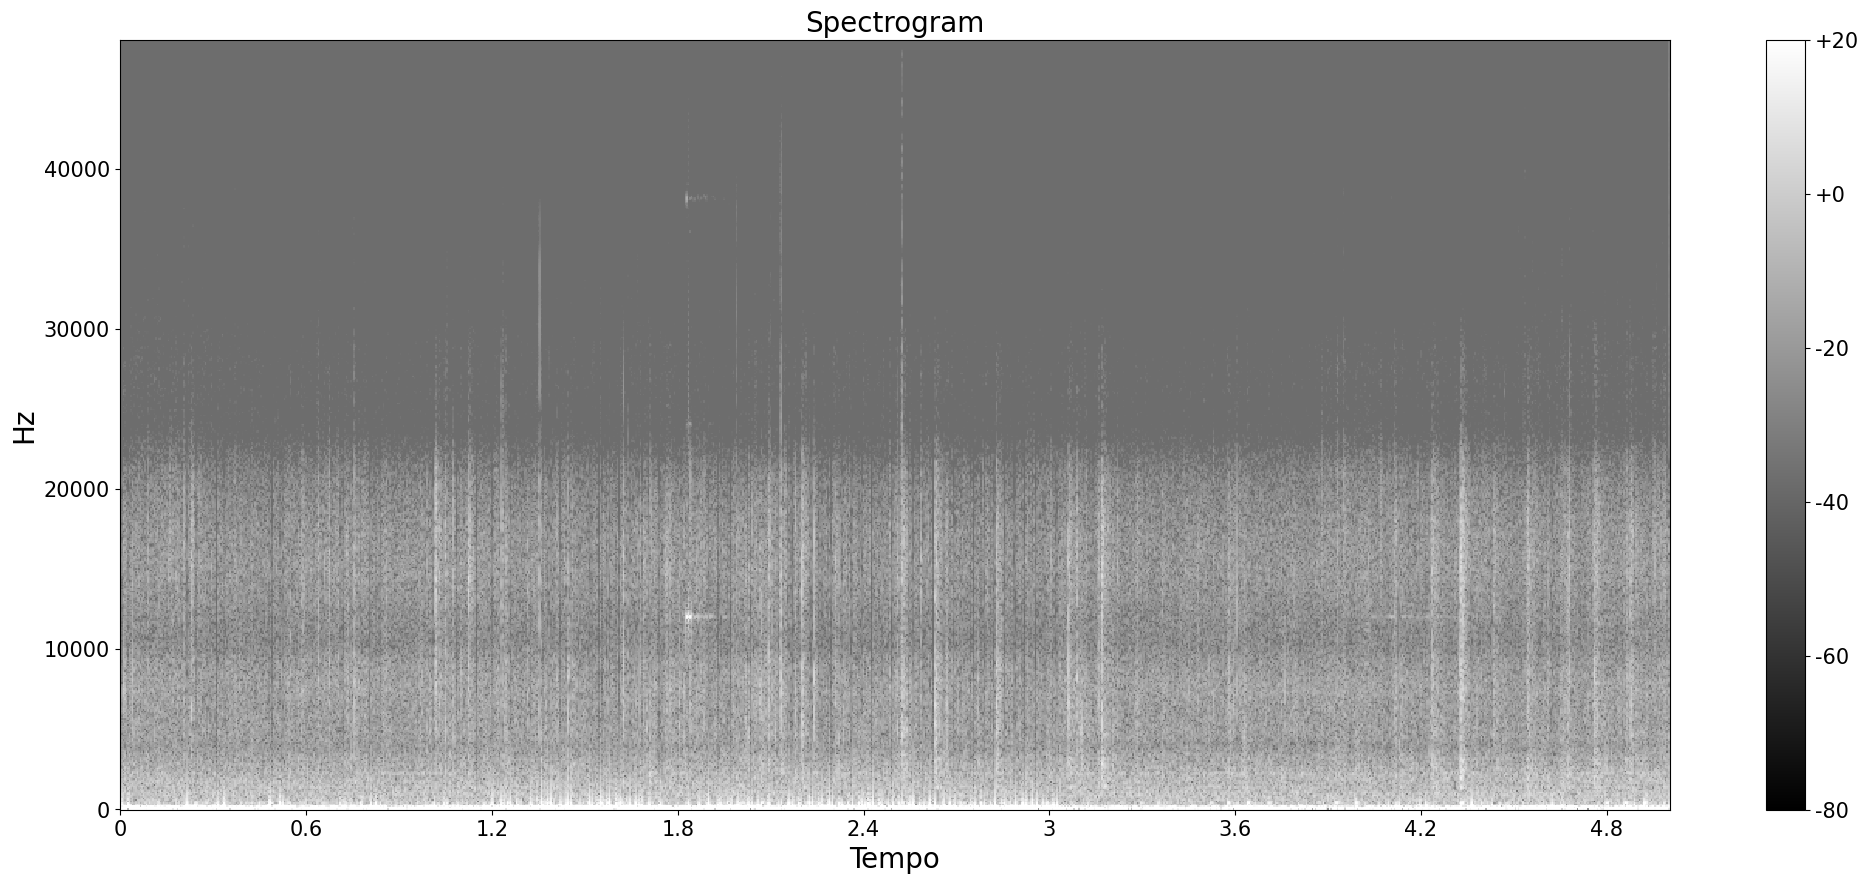

In [13]:
S_ch_raw1 = librosa.stft(ch_1raw, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
Y_scale = np.abs(S_ch_raw1) ** 2
Y_log_scale1 = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale1 , sr, HOP_SIZE,y_axis="linear")
filename = 'test'
plt.savefig(filename, bbox_inches='tight', pad_inches=0)

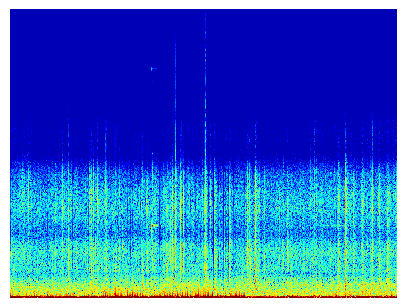

In [22]:
S_ch_raw1 = librosa.stft(ch_1raw, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
Y_scale = np.abs(S_ch_raw1) ** 2
Y_log_scale1 = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale1 , sr, HOP_SIZE,y_axis="linear", title="Audio sem pré-processamento")

In [42]:
Y_log_scale.shape

(4, 1025, 1001)

In [13]:
Y_log_scale[0].shape

(1025, 1001)

In [25]:
audio_data, sample_rate = librosa.load(file_raw, sr=None, mono=False)
file_raw ='C:/Users/flora/OneDrive/Documentos/MESTRADO_UFSC/rotinas/python/espectrogramas/five_second_call.wav'
#Definindo os parâmetros
FRAME_SIZE = 2048 #samples
HOP_SIZE = 480 #samples
sr=96000
  

S_ch_raw = librosa.stft(audio_data, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
Y_scale = np.abs(S_ch_raw) ** 2
#GERA UMA VARIÁVEL COM 3 DIMENSÕES SENDO QUE A PRIMEIRA É O CANAL
Y_log_scale = librosa.power_to_db(Y_scale)

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

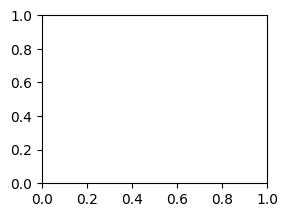

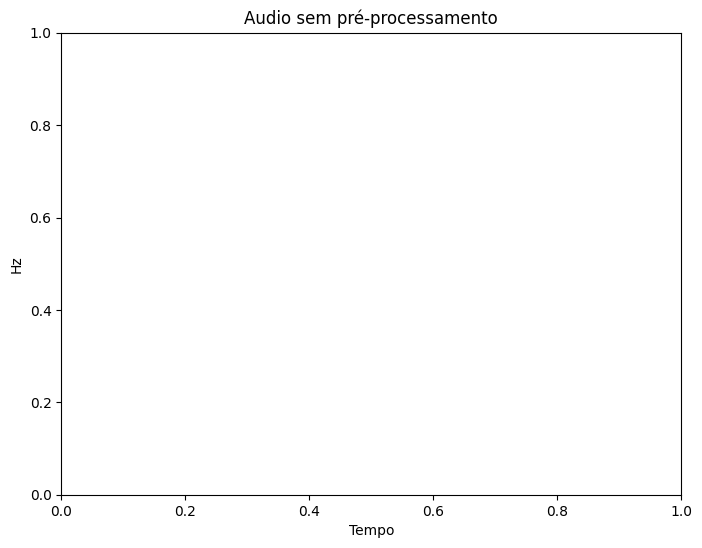

In [43]:

# Chame a função plot_spectrogram_in_subplot para cada subplot
plot_spectrogram_in_subplot(Y_log_scale[0], sr, HOP_SIZE, y_axis="linear", title="Audio sem pré-processamento")
plot_spectrogram_in_subplot(Y_log_scale[1], sr, HOP_SIZE, y_axis="linear", title="Audio sem pré-processamento")
plot_spectrogram_in_subplot(Y_log_scale[2], sr, HOP_SIZE, y_axis="linear", title="Audio sem pré-processamento")
plot_spectrogram_in_subplot(Y_log_scale[3], sr, HOP_SIZE, y_axis="linear", title="Audio sem pré-processamento")



AGORA VAMOS PLOTAR O AUDIO COM REMOÇÃO DE RUÍDO

In [7]:
audio_data, sample_rate = librosa.load(file_den, sr=None, mono=False)
#separando os canais
ch_1den = audio_data[0]
ch_2den = audio_data[1]
ch_3den = audio_data[2]
ch_4den = audio_data[3]

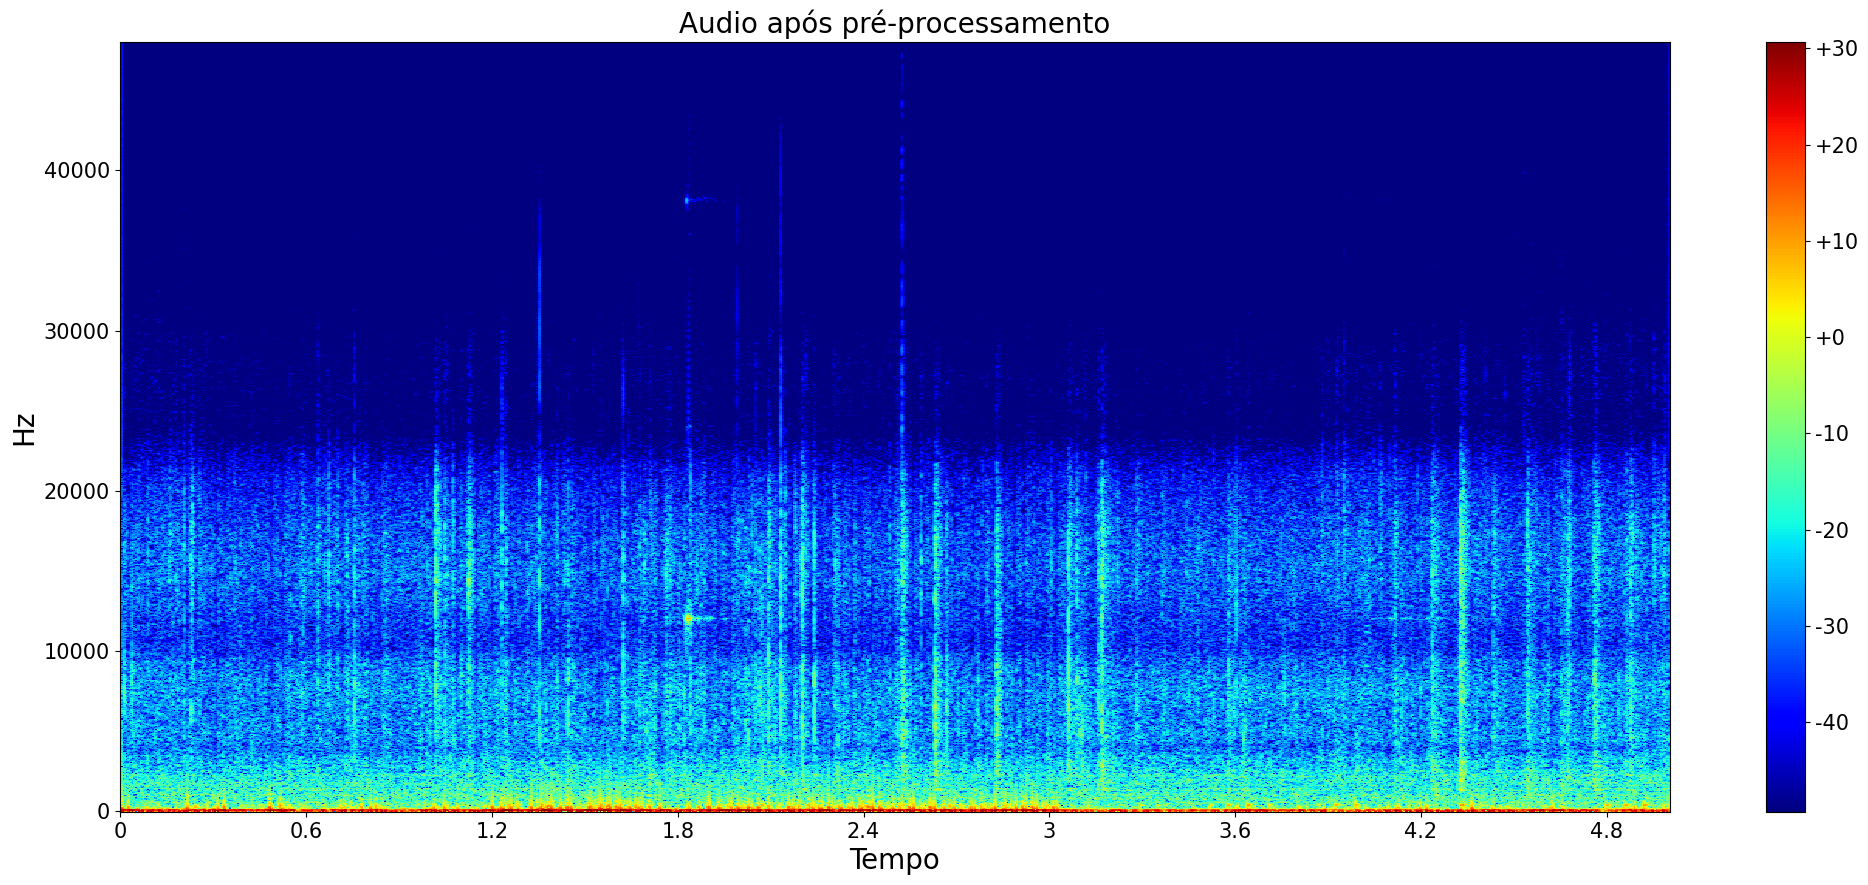

In [8]:
S_ch_den1 = librosa.stft(ch_1den, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
Y_scale = np.abs(S_ch_den1) ** 2
Y_log_scale1 = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale1 , sr, HOP_SIZE,y_axis="linear", title="Audio após pré-processamento")